# 导入数据

In [188]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

data = pd.read_csv("US_Crime_Rates_1960_2014.csv")
data.head(10)

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


# 将Year的数据类型转换为datetime64

In [74]:
data.Year = pd.to_datetime(data.Year,format = "%Y")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Year                55 non-null     datetime64[ns]
 1   Population          55 non-null     int64         
 2   Total               55 non-null     int64         
 3   Violent             55 non-null     int64         
 4   Property            55 non-null     int64         
 5   Murder              55 non-null     int64         
 6   Forcible_Rape       55 non-null     int64         
 7   Robbery             55 non-null     int64         
 8   Aggravated_assault  55 non-null     int64         
 9   Burglary            55 non-null     int64         
 10  Larceny_Theft       55 non-null     int64         
 11  Vehicle_Theft       55 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 5.3 KB


# 将Year设置为DataFrame的索引

In [182]:
datas = data.set_index("Year",drop = True)
datas.head(10)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600


# 计算各种类犯罪在总人口中的占比

单纯的犯罪数量，没有比较没有占比几乎没有意义，所以这里计算占比

In [183]:
datas["crime_rate"] = datas["Total"]/datas["Population"]
datas["violent_rate"] = datas["Violent"]/datas["Population"]
datas["property_rate"] = datas["Property"]/datas["Population"]
datas["murder_rate"] = datas["Murder"]/datas["Population"]
datas["rape_rate"] = datas["Forcible_Rape"]/datas["Population"]
datas["robbery_rate"] = datas["Robbery"]/datas["Population"]
datas["agg_rate"] = datas["Aggravated_assault"]/datas["Population"]
datas["burglary_rate"] = datas["Burglary"]/datas["Population"]
datas["larceny_theft_rate"] = datas["Larceny_Theft"]/datas["Population"]
datas["vehicle_theft_rate"] = datas["Vehicle_Theft"]/datas["Population"]
datas.head(10)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,...,crime_rate,violent_rate,property_rate,murder_rate,rape_rate,robbery_rate,agg_rate,burglary_rate,larceny_theft_rate,vehicle_theft_rate
Year,,,,,,,,,,,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,...,0.018872,0.001609,0.017263,0.000051,0.000096,0.000601,0.000861,0.005086,0.010347,0.001830
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,...,0.019061,0.001581,0.017479,0.000048,0.000094,0.000583,0.000857,0.005189,0.010454,0.001836
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,...,0.020198,0.001623,0.018575,0.000046,0.000094,0.000597,0.000886,0.005352,0.011248,0.001974
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,...,0.021803,0.001682,0.020121,0.000046,0.000094,0.000618,0.000924,0.005764,0.012191,0.002166
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,...,0.023881,0.001906,0.021975,0.000049,0.000112,0.000682,0.001062,0.006347,0.013155,0.002474
1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,...,0.024490,0.002002,0.022488,0.000051,0.000121,0.000717,0.001113,0.006627,0.013293,0.002568
1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,...,0.026708,0.002200,0.024509,0.000056,0.000132,0.000808,0.001203,0.007210,0.014429,0.002869
1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,...,0.029897,0.002532,0.027365,0.000062,0.000140,0.001028,0.001302,0.008266,0.015758,0.003341
1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,...,0.033702,0.002984,0.030718,0.000069,0.000159,0.001318,0.001438,0.009323,0.017466,0.003930


# 对各类数据占比进行可视化

In [184]:
datas_rate_list = [i for i in datas.columns if "rate" in i]
drl = datas[datas_rate_list]
drl.head(10)

,crime_rate,violent_rate,property_rate,murder_rate,rape_rate,robbery_rate,agg_rate,burglary_rate,larceny_theft_rate,vehicle_theft_rate
Year,,,,,,,,,,
1960,0.018872,0.001609,0.017263,0.000051,0.000096,0.000601,0.000861,0.005086,0.010347,0.001830
1961,0.019061,0.001581,0.017479,0.000048,0.000094,0.000583,0.000857,0.005189,0.010454,0.001836
1962,0.020198,0.001623,0.018575,0.000046,0.000094,0.000597,0.000886,0.005352,0.011248,0.001974
1963,0.021803,0.001682,0.020121,0.000046,0.000094,0.000618,0.000924,0.005764,0.012191,0.002166
1964,0.023881,0.001906,0.021975,0.000049,0.000112,0.000682,0.001062,0.006347,0.013155,0.002474
1965,0.024490,0.002002,0.022488,0.000051,0.000121,0.000717,0.001113,0.006627,0.013293,0.002568
1966,0.026708,0.002200,0.024509,0.000056,0.000132,0.000808,0.001203,0.007210,0.014429,0.002869
1967,0.029897,0.002532,0.027365,0.000062,0.000140,0.001028,0.001302,0.008266,0.015758,0.003341
1968,0.033702,0.002984,0.030718,0.000069,0.000159,0.001318,0.001438,0.009323,0.017466,0.003930


从1960到2010期间，整体犯罪呈先上升后下降的趋势，80年代犯罪率最高，而几乎90%的犯罪都是财务犯罪，暴力犯罪占比较少。

<AxesSubplot:xlabel='Year'>

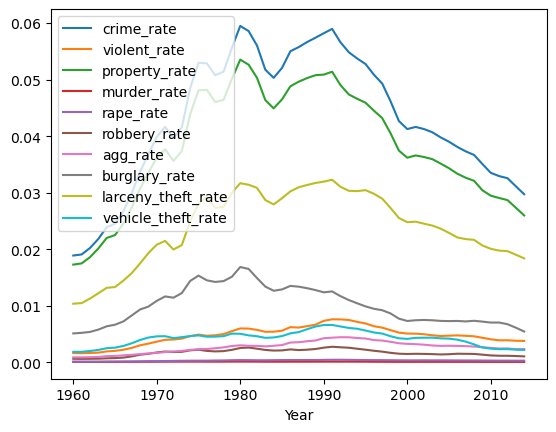

In [185]:
%matplotlib inline
drl.plot()

<AxesSubplot:xlabel='Year'>

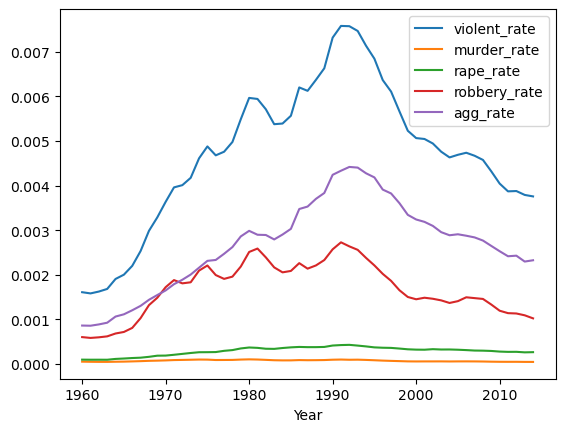

In [186]:
datas[["violent_rate","murder_rate","rape_rate","robbery_rate","agg_rate"]].plot()

暴力犯罪与整体犯罪趋势相同，主要为抢劫（Robbery）与暴力袭击（Aggravated_assault）犯罪。

<AxesSubplot:xlabel='Year'>

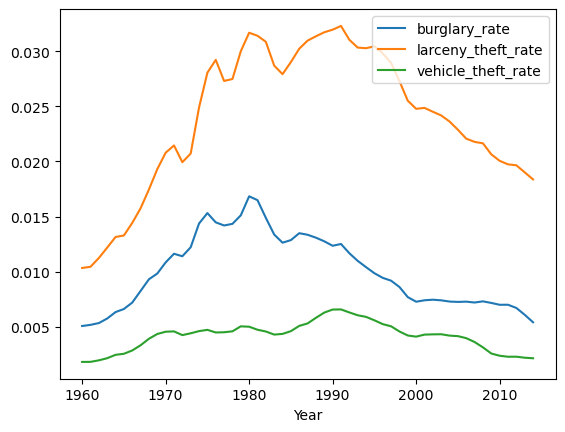

In [187]:
datas[["burglary_rate","larceny_theft_rate","vehicle_theft_rate"]].plot()

财产犯罪也与整体犯罪趋势相同，最主要为入室盗窃（Larceny_Theft）。

# 美国最危险和最安全的时期

最危险的时期：
从图中也可看出，上世界80~90年代，由于对苏冷战，两个超级大国军备竞赛，全力发展重工军工，导致国民生活水平下降，犯罪率到达峰值。

In [83]:
drl.idxmax()

crime_rate            20
violent_rate          31
property_rate         20
murder_rate           20
rape_rate             32
robbery_rate          31
agg_rate              32
burglary_rate         20
larceny_theft_rate    31
vehicle_theft_rate    31
dtype: int64

最安全的时期：
从图中也可看出，数据的首尾犯罪率降至最低。上世纪60年代和本世纪10年代，美国都属于唯一一极，生活水平高，犯罪率低。

In [177]:
drl.idxmin()

crime_rate             0
violent_rate           1
property_rate          0
murder_rate           54
rape_rate              3
robbery_rate           1
agg_rate               1
burglary_rate          0
larceny_theft_rate     0
vehicle_theft_rate     0
dtype: int64

# 预测未来几年的犯罪率

In [158]:
crime = drl["crime_rate"]
crime = pd.concat([crime, datas["Year"]],axis = 1)
crime = pd.concat([crime.iloc[:,-1],crime.iloc[:,:-1]],axis = 1)
crime.columns = ["year","rate"]
crime = crime.set_index("year",drop = True)
crime.head(10)

,rate
year,
1960,0.018872
1961,0.019061
1962,0.020198
1963,0.021803
1964,0.023881
1965,0.024490
1966,0.026708
1967,0.029897
1968,0.033702


In [111]:
model = ExponentialSmoothing(crime["rate"], trend="add")
results = model.fit()

预测数据

In [161]:
forecast = results.forecast(steps=6)
years = range(2015,2021)
forecast = pd.DataFrame({"year": years, "rate": forecast})
forecast = forecast.set_index("year",drop = True)
forecast

,rate
year,
2015,0.028652
2016,0.027583
2017,0.026515
2018,0.025446
2019,0.024378
2020,0.023309


将两部分数据合并

In [162]:
df = pd.concat([crime,forecast])
df

,rate
year,
1960,0.018872
1961,0.019061
1962,0.020198
1963,0.021803
1964,0.023881
...,...
2016,0.027583
2017,0.026515
2018,0.025446


<module 'matplotlib.pyplot' from 'D:\\shenghongchang\\Python\\py\\lib\\site-packages\\matplotlib\\pyplot.py'>

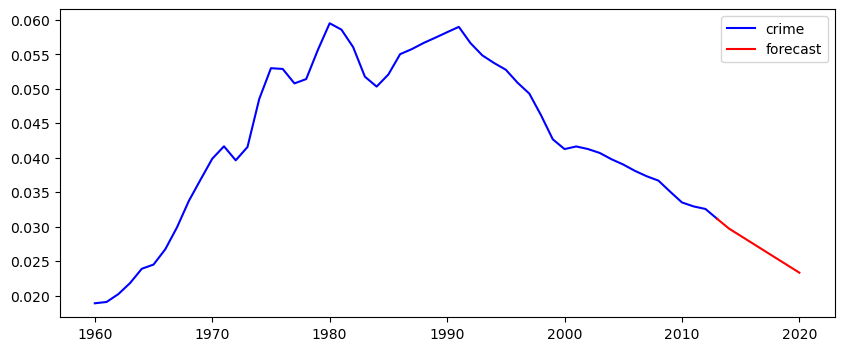

In [172]:
plt.figure(figsize = (10,4))
plt.plot(df[:54],color = "b",label = "crime")
plt.plot(df[53:],color = "r",label = "forecast")
plt.legend()
plt